<a href="https://colab.research.google.com/github/ahaque12/538-Barber/blob/master/538_Barber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 538 Barber

https://fivethirtyeight.com/features/can-you-get-a-haircut-already/

From Dave Moran comes a question we’ve all faced at some point when waiting in line for a haircut:

At your local barbershop, there are always four barbers working simultaneously. Each haircut takes exactly 15 minutes, and there’s almost always one or more customers waiting their turn on a first-come, first-served basis.

Being a regular, you prefer to get your hair cut by the owner, Tiffany. If one of the other three chairs opens up, and it’s your turn, you’ll say, “No thanks, I’m waiting for Tiffany.” The person behind you in line will then be offered the open chair, and you’ll remain at the front of the line until Tiffany is available.

Unfortunately, you’re not alone in requesting Tiffany — a quarter of the other customers will hold out for Tiffany, while no one will hold out for any of the other barbers.

One Friday morning, you arrive at the barber shop to see that all four barbers are cutting hair, and there is one customer waiting. You have no idea how far along any of the barbers is in their haircuts, and you don’t know whether or not the customer in line will hold out for Tiffany.

What is the expected wait time for getting a haircut from Tiffany?

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

There are three scenarios to take note of:
1. If the person waiting on line is holding out for Tiffany then you have to wait for Tiffany to complete her haircut and then wait 15 minutes for her to complete the 2nd haircut.
2. If the person waiting on line is not holding out for Tiffany then if Tiffany is first to finish her haircut you will have to wait for the duration of the first haircut and an additional 15 minutes for the 2nd haircut.
3. If the person waiting on line is not holding out for Tiffany and Tiffany is not first to finish her haircut you will have to wait for the duration of Tiffany's haircut.

One way to approach the problem is through monte-carlo simulation. We simulate a large number of scenarios for where each barber is in their respective haircut.

In [10]:
HAIRCUT_TIME = 15

def start_setting(scenarios=1000):
  """Generate starting scenario.

  Starting scenario for how long each barber
  has left for their haircuts. Each row represents
  a different scenario. The first column
  in the array is Tiffany. A scenario of
  [2, 13, 5, 8] implies Tiffany is 2 minutes left for
  her haircut and the other barbers have 13, 15, and 8
  minutes left respectively.

  Args:
    scenarios: int, optional (default=1000)
      Number of scenarios to generate

  Returns:
    setting: np.array
      Positions of each barber.
  """
  return np.random.random((scenarios, 4))*15

start_setting(5)

array([[12.74457137,  6.18926885, 10.21996507,  2.08585129],
       [ 8.19148968, 12.91333771,  9.95049319,  1.09279886],
       [11.39016022,  7.08265754,  3.91320088, 14.95237528],
       [13.81580759,  7.76243218,  1.9172258 , 13.48818229],
       [12.44217577, 10.06905142,  0.78857871, 14.63017698]])

In [0]:
# Number of scenarios
N = 10000000

trials = start_setting(N)

If the person on line will hold out for Tiffany they are expected to wait until Tiffany finishes her haircut regardless of when the other barbers finish. The expected wait time will then be $15 + E[$Time taken for Tiffany$]$ which is 22.5. This is confirmed in the simulation.

In [12]:
# Average wait time if person on line is waiting for Tiffany
scen1_avg = 15 + trials[:, 0].mean()
scen1_avg

22.498310466696164

If the person on line will go to any barber then we can consider scenarios #2 and #3 separately. When Tiffany finishes first the wait time is 15 minutes plus the time it takes for Tiffany to finish. If Tiffany does not finish first then we wait the time taken for Tiffany to complete the haircut.

In [0]:
# Calculate time taken when the person on line is agnostic to any barber.
time_taken = np.zeros(N)

# Identify times when Tiffany finishes first
tiffany_first_ix = trials[:, 0] == np.min(trials, axis=1)

time_taken[tiffany_first_ix] = trials[tiffany_first_ix, 0] + 15
time_taken[~tiffany_first_ix] = trials[~tiffany_first_ix, 0]

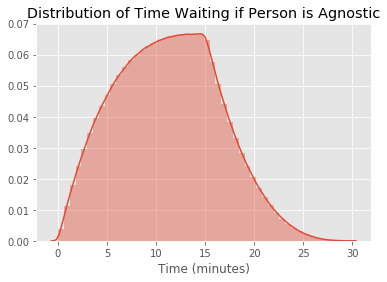

In [14]:
sns.distplot(time_taken)
plt.xlabel("Time (minutes)")
plt.title("Distribution of Time Waiting if Person is Agnostic");

In [15]:
# Average time taken if person is agnostic
scen23_avg = time_taken.mean()
scen23_avg

11.252618466696156

In [16]:
# Total expected waiting time
.25*scen1_avg + .75*scen23_avg

14.064041466696157

The expected waiting time is roughly 14.06 minutes.